<a href="https://colab.research.google.com/github/ingrid1017/EjercicioRA2/blob/main/RedUnidireccional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: Importar las bibliotecas necesarias

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

#Paso 2: Cargar el conjunto de datos MNIST

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#Normalizar los valores de píxeles entre 0 y 1

In [ ]:
train_images= train_images / 255.0
test_images= test_images / 255.0


#Paso 3: Construir el modelo unidireccional(Freedforward)

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito), usando softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Paso 4: Compilar el modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Paso 5: Entrenar el modelo

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8791 - loss: 0.4271 - val_accuracy: 0.9591 - val_loss: 0.1356
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9658 - loss: 0.1173 - val_accuracy: 0.9696 - val_loss: 0.0978
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9765 - loss: 0.0762 - val_accuracy: 0.9727 - val_loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0580 - val_accuracy: 0.9767 - val_loss: 0.0760
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9775 - val_loss: 0.0782


#Paso 6:Evaluar el modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0939

Precisión en el conjunto de prueba: 0.9775000214576721


#Visualizar la precisión durante el entrenamiento

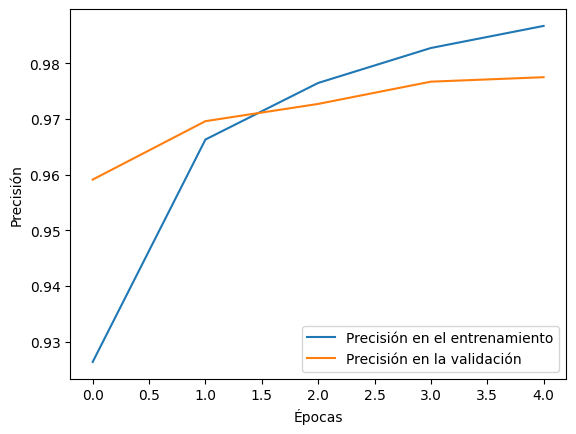

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()